In [1]:
! pip install -q scikit-learn
! pip install -q pandas

In [3]:
from azureml.core import Workspace, Dataset

subscription_id = '9362b858-810e-43a9-a063-9564838ece5e'
resource_group = 'a.msanabria-rg'
workspace_name = 'practica-azure'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Phone_price')
path_to_data = dataset.download(target_path='.', overwrite=True)
path_to_data

['/mnt/batch/tasks/shared/LS_root/mounts/clusters/practica-ml-process/code/Users/a.msanabria/phone_prices.csv']

In [6]:
import pandas as pd
df = pd.read_csv(path_to_data[0])
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train.shape, test.shape

((1600, 21), (400, 21))

In [14]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:,-1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:,-1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600, 20), (1600,), (400, 20), (400,))

# Support Vector Machine (SVM)

In [15]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

svc_macro_precision = 0.940409917271968
svc_micro_precision = 0.94
svc_macro_recall = 0.9394193626093379
svc_micro_recall = 0.94
svc_accuracy = 0.94


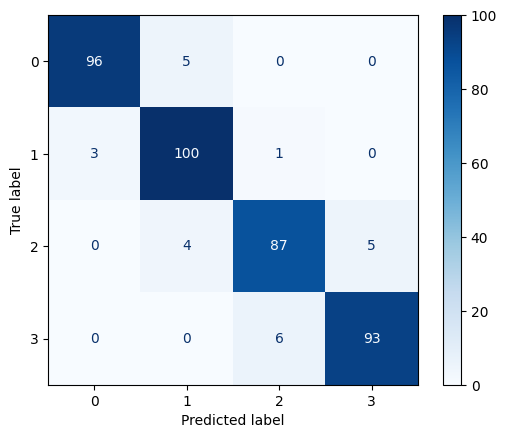

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


preds = svc.predict(X_test)


svc_macro_precision = precision_score(y_true=y_test, y_pred=preds, average='macro')
svc_micro_precision = precision_score(y_true=y_test, y_pred=preds, average='micro')

svc_macro_recall = recall_score(y_true=y_test, y_pred=preds, average='macro')
svc_micro_recall = recall_score(y_true=y_test, y_pred=preds, average='micro')

svc_accuracy = accuracy_score(y_true=y_test, y_pred=preds)

print(f'{svc_macro_precision = }')
print(f'{svc_micro_precision = }')
print(f'{svc_macro_recall = }')
print(f'{svc_micro_recall = }')
print(f'{svc_accuracy = }')

svc_confussion_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
ConfusionMatrixDisplay(svc_confussion_matrix).plot(cmap='Blues')

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

random_forest_macro_precision = 0.8827223591284019
random_forest_micro_precision = 0.8825
random_forest_macro_recall = 0.882221635625101
random_forest_micro_recall = 0.8825
random_forest_accuracy = 0.8825


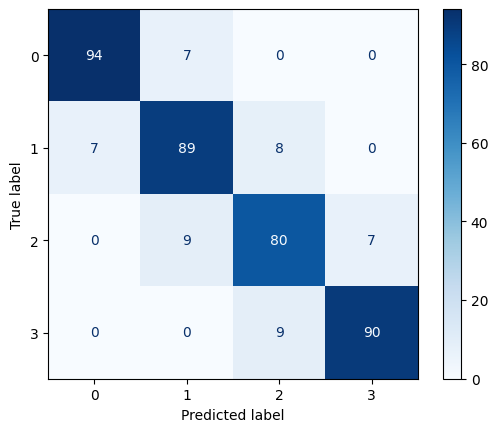

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


preds = random_forest.predict(X_test)


random_forest_macro_precision = precision_score(y_true=y_test, y_pred=preds, average='macro')
random_forest_micro_precision = precision_score(y_true=y_test, y_pred=preds, average='micro')

random_forest_macro_recall = recall_score(y_true=y_test, y_pred=preds, average='macro')
random_forest_micro_recall = recall_score(y_true=y_test, y_pred=preds, average='micro')

random_forest_accuracy = accuracy_score(y_true=y_test, y_pred=preds)

print(f'{random_forest_macro_precision = }')
print(f'{random_forest_micro_precision = }')
print(f'{random_forest_macro_recall = }')
print(f'{random_forest_micro_recall = }')
print(f'{random_forest_accuracy = }')

random_forest_confussion_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
ConfusionMatrixDisplay(random_forest_confussion_matrix).plot(cmap='Blues')